In [1]:
%autoreload 2 
%matplotlib inline

<function __main__.plot_perspective>

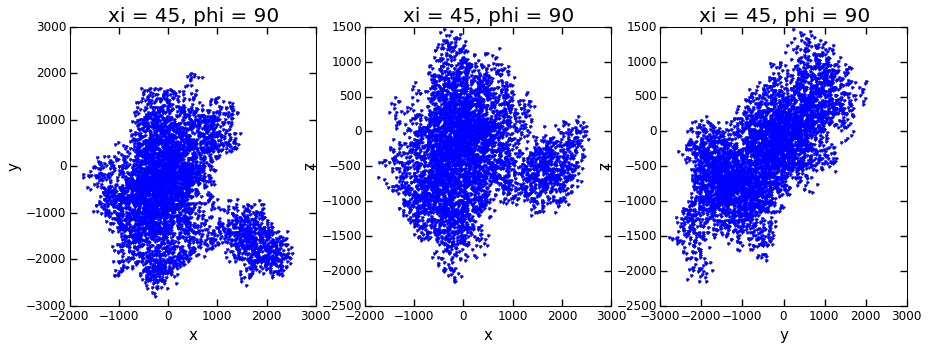

In [14]:
interact(plot_perspective, xi=(0, 90), phi=(0, 180))

In [2]:
from __future__ import (print_function, unicode_literals, 
                        division, absolute_import)

In [3]:
import h5py
import pandas as pd
import numpy as np 

In [4]:
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

In [5]:
import extract_catalog as ext_cat
import get_gal_centroids as getg
import plot_clst_prop as plotClst
from IPython.html.widgets import interact

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [6]:
dataPath = "../../data/"

In [7]:
original_f = h5py.File(dataPath + 
                "Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135.hdf5")

In [8]:
df = ext_cat.extract_clst(original_f, 0)

In [9]:
pos = [k for k in df.keys() if "SubhaloPos" in k]

In [10]:
%pdb

Automatic pdb calling has been turned ON


rotating points by angle xi

In [11]:
df[pos][:10]

,SubhaloPos0,SubhaloPos1,SubhaloPos2
0,0.000000,0.000000,0.000000
1,-744.470490,-1607.318359,-1448.265625
2,-167.178101,501.337891,-1121.117188
3,274.732117,238.501953,-138.343750
4,61.319946,360.355469,-767.656250
5,-65.280518,269.515625,-2847.538086
6,591.487854,306.462891,1108.242188
7,-659.313141,206.179688,-2491.986328
8,-1010.009705,-2089.460938,-1561.896484
9,-95.760254,417.144531,-384.330078


easier to think: 
* keep los as z axis 
* rotate this los 

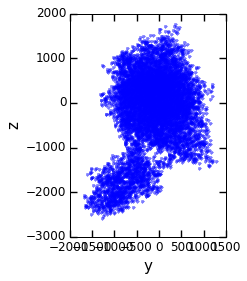

In [12]:
final_los_along_x = df[pos][:10000].apply(lambda x: 
         getg.project_coords(x, xi=0, phi=0, 
                             los_axis=4), axis=1)
final_los_along_x = np.array(final_los_along_x)
plt.axes().set_aspect('equal')
plt.plot(final_los_along_x[:, 0], 
         final_los_along_x[:, 1], '.', alpha=0.5)
plt.xlabel('y')
plt.ylabel('z')

# The projection we have rotates the obj

but our coordinate system is fixed ...

In [13]:
def plot_perspective(xi, phi):
    stuff = df[pos][:5000].apply(lambda x: 
         getg.project_coords(x, xi=xi, phi=phi, 
                             los_axis=4, radian=False), axis=1)
    plt.figure(figsize=(15, 5))
    stuff = np.array(stuff)
    plt.subplot(131)

    plt.plot(stuff[:, 0], stuff[:, 1], '.', alpha=1.)
    plt.title('xi = {0}, phi = {1}'.format(xi, phi))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.subplot(132)

    plt.plot(stuff[:, 0], stuff[:, 2], '.', alpha=1.)
    plt.title('xi = {0}, phi = {1}'.format(xi, phi))
    plt.xlabel('x')
    plt.ylabel('z')

    plt.subplot(133)
    plt.plot(stuff[:, 1], stuff[:, 2], '.', alpha=1.)
    plt.title('xi = {0}, phi = {1}'.format(xi, phi))
    plt.xlabel('y')
    plt.ylabel('z')